In [55]:
import pandas as pd
import numpy as np

In [68]:
df = pd.read_excel('nba_player_stats.xlsx')

In [77]:
df['season'].unique()

array([2020, 2021, 2022], dtype=int64)

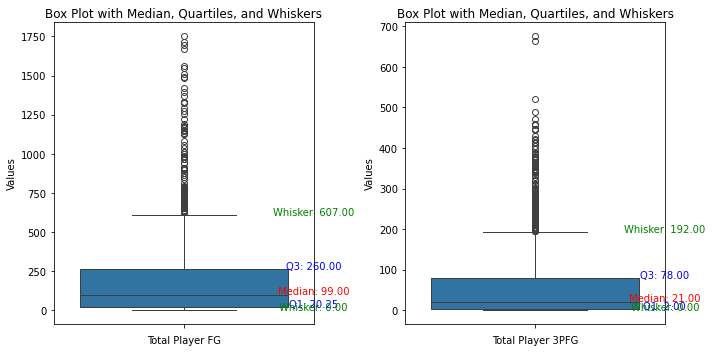

In [81]:
# Sample DataFrame
# Assuming df is your DataFrame
# For this example, I'll create a sample DataFrame
import pandas as pd


# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first boxplot
sns.boxplot(data=df['sumfg'], ax=ax1)

# Add annotations for the first boxplot
median = np.median(df['sumfg'])
ax1.text(0.5, median, f'Median: {median:.2f}', fontsize=10, color='red', ha='center')
quartiles = np.percentile(df['sumfg'], [25, 75])
ax1.text(0.5, quartiles[0], f'Q1: {quartiles[0]:.2f}', fontsize=10, color='blue', ha='center')
ax1.text(0.5, quartiles[1], f'Q3: {quartiles[1]:.2f}', fontsize=10, color='blue', ha='center')
whiskers = ax1.lines[:2]
for whisker in whiskers:
    ax1.text(0.5, whisker.get_ydata()[1], f'Whisker: {whisker.get_ydata()[1]:.2f}', fontsize=10, color='green', ha='center')
ax1.set_title('Box Plot with Median, Quartiles, and Whiskers')
ax1.set_xlabel('Total Player FG')
ax1.set_ylabel('Values')

# Plot the second boxplot
# For demonstration purposes, I'm using the same data for the second boxplot
sns.boxplot(data=df['sumfg3'], ax=ax2)

# Add annotations for the second boxplot
median = np.median(df['sumfg3'])
ax2.text(0.5, median, f'Median: {median:.2f}', fontsize=10, color='red', ha='center')
quartiles = np.percentile(df['sumfg3'], [25, 75])
ax2.text(0.5, quartiles[0], f'Q1: {quartiles[0]:.2f}', fontsize=10, color='blue', ha='center')
ax2.text(0.5, quartiles[1], f'Q3: {quartiles[1]:.2f}', fontsize=10, color='blue', ha='center')
whiskers = ax2.lines[:2]
for whisker in whiskers:
    ax2.text(0.5, whisker.get_ydata()[1], f'Whisker: {whisker.get_ydata()[1]:.2f}', fontsize=10, color='green', ha='center')
ax2.set_title('Box Plot with Median, Quartiles, and Whiskers')
ax2.set_xlabel('Total Player 3PFG')
ax2.set_ylabel('Values')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

* The highest average points is 8.88 (excluding outliers), and the lowest is 0.
* Half the average player field goal points are greater than or equal to 2.06 points and half are less than 2.06 points.
* 25% of the average player field goal points fall below 0.72 points.
* 75% of the average player field goal points fall below 4.01, and 25% of the average player FG is greater 4.01 points.

In [79]:
median = np.median(df['avgfg'])
median

2.0606310768666294

In [76]:
df[df['avgfg'] <= 0.72].shape[0]/df.shape[0]

0.2502532928064843

In [80]:
df.head()

,season,player,Team_Abbrev,sumfg,sumfg3,sumft,sumorb,sumast,sumpts,sumdrb,...,sumblk,avgfg,avgfg3,avgft,avgorb,avgast,avgpts,avgdrb,avgstl,avgblk
0,2020,Aaron Gordon,ORL,335,73,151,107,228,894,368,...,39,5.403226,1.177419,2.435484,1.725806,3.677419,14.419355,5.935484,0.822581,0.629032
1,2020,Aaron Holiday,IND,245,91,77,23,235,658,138,...,16,3.181818,1.181818,1.000000,0.298701,3.051948,8.545455,1.792208,0.766234,0.207792
2,2020,Abdel Nader,OKC,248,98,104,30,76,698,176,...,44,1.746479,0.690141,0.732394,0.211268,0.535211,4.915493,1.239437,0.338028,0.309859
3,2020,Adam Mokoka,CHI,12,6,2,7,4,32,3,...,0,0.666667,0.333333,0.111111,0.388889,0.222222,1.777778,0.166667,0.222222,0.000000
4,2020,Admiral Schofield,WAS,35,19,10,7,15,99,40,...,4,0.795455,0.431818,0.227273,0.159091,0.340909,2.250000,0.909091,0.181818,0.090909


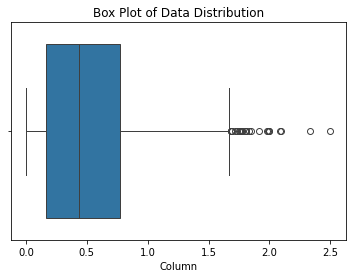

In [117]:
# Assuming 'data' is your DataFrame and 'column_name' is the column you want to check
sns.boxplot(data=df, x='avgstl')
plt.title('Box Plot of Data Distribution')
plt.xlabel('Column')
plt.show()

In [33]:
from sklearn.ensemble import IsolationForest

In [118]:
points = df['avgstl'].values.reshape(1,-1)

In [157]:
model = IsolationForest(contamination = 0.1)

In [158]:
model.fit(points)

IsolationForest(contamination=0.1)

In [159]:
outliers = model.predict(points)

In [160]:
outliers.shape

(1,)